In [113]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
os.chdir('/Users/user/Desktop/mm/m')

In [3]:
data=pd.read_csv('/Users/user/Desktop/mm/m/train-1574429526318.csv')

In [4]:
data.head(10)

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0
5,2747,16570.090090,Extended,Bachelor,Employed,M,23589,"19,71.4",Suburban,Married,...,13,NaN,6.0,Special Auto,Special L2,Offer2,Agent,1012.800000,Luxury SUV,3.0
6,3633,3653.703458,Extended,College,Employed,F,74126,"28.6,76.3",Suburban,Married,...,76,0.0,1.0,Corporate Auto,Corporate L3,Offer2,Call Center,478.751065,Two-Door Car,2.0
7,3856,11154.675990,Extended,Doctor,Employed,F,31409,"17.3,79.1",Urban,Married,...,50,0.0,2.0,Personal Auto,Personal L3,Offer1,Branch,381.960657,Four-Door Car,2.0
8,9005,4428.031583,Basic,High School or Below,Employed,F,58577,"17.6,78.5",Urban,Married,...,62,0.0,1.0,Personal Auto,Personal L3,Offer1,Agent,303.872752,SUV,2.0
9,5725,8382.630118,Basic,High School or Below,Retired,M,19683,"13.2,80.3",Suburban,Married,...,41,1.0,9.0,Corporate Auto,Corporate L1,Offer1,Web,561.600000,Sports Car,2.0


In [5]:
data.isnull().sum()

CustomerID                         0
Customer.Lifetime.Value            0
Coverage                         925
Education                        129
EmploymentStatus                 118
Gender                           129
Income                             0
Location.Geo                       0
Location.Code                    119
Marital.Status                   129
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints        818
Number.of.Policies               121
Policy.Type                      891
Policy                           121
Renew.Offer.Type                 128
Sales.Channel                    128
Total.Claim.Amount                 0
Vehicle.Class                    126
Vehicle.Size                     126
dtype: int64

In [6]:
data.Coverage.value_counts()

Basic       5361
Extended    2697
Premium      823
Name: Coverage, dtype: int64

In [7]:
data.Education.value_counts()

Bachelor                2934
College                 2836
High School or Below    2796
Master                   759
Doctor                   352
Name: Education, dtype: int64

In [8]:
data.shape

(9806, 22)

In [9]:
data.Education.isnull().sum()

129

In [10]:
data.Education=pd.Categorical(data.Education,categories=['Bachelor','College','High School or Below','Master','Doctor','Others'],ordered=False)

In [11]:
data.Education.fillna('Others',inplace=True)

In [12]:
data.Education.value_counts()

Bachelor                2934
College                 2836
High School or Below    2796
Master                   759
Doctor                   352
Others                   129
Name: Education, dtype: int64

In [13]:
data.Education.isnull().sum()

0

In [14]:
data.Gender.value_counts()

F    4985
M    4692
Name: Gender, dtype: int64

In [15]:
data.Gender.isnull().sum()

129

In [16]:
data.Gender=pd.Categorical(data.Gender,categories=['M','F','Others'],ordered=False)

In [17]:
data.Gender.fillna('Others',inplace=True)

In [18]:
data.Gender.value_counts()

F         4985
M         4692
Others     129
Name: Gender, dtype: int64

In [19]:
data.Gender.isnull().sum()

0

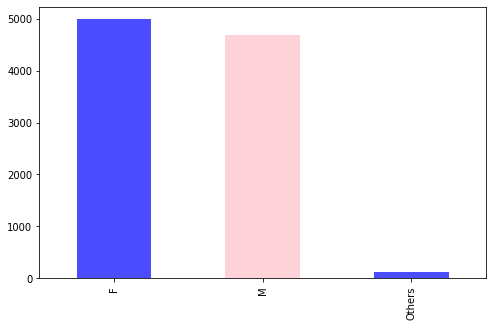

In [20]:
plt.figure()
data.Gender.value_counts().plot(kind='bar',figsize=(8,5),color=['blue','pink'],alpha=0.7,fontsize=10)

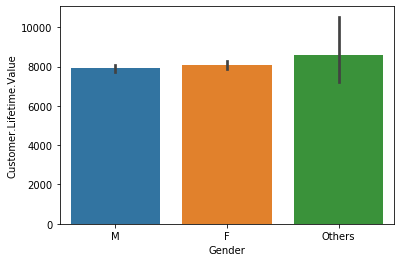

In [21]:
sns.barplot(x='Gender',y='Customer.Lifetime.Value',data=data)

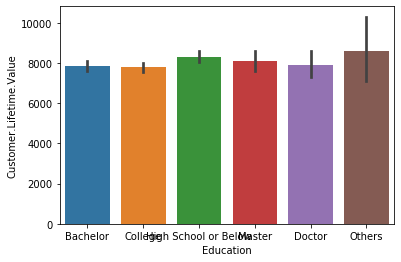

In [22]:
sns.barplot(x='Education',y='Customer.Lifetime.Value',data=data)

In [23]:
data.drop(['Gender','Education'],axis=1,inplace=True)

In [24]:
data.drop(['CustomerID'],axis=1,inplace=True)

In [25]:
data.head()

,Customer.Lifetime.Value,Coverage,EmploymentStatus,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,7824.372789,Basic,Unemployed,0,"17.7,77.7",Urban,Married,67.0,2,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,8005.964669,Basic,Employed,63357,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,8646.504109,Basic,Employed,64125,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,9294.088719,Basic,Employed,67544,"19,72.5",Suburban,Married,116.0,2,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,5595.971365,Basic,Retired,19651,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


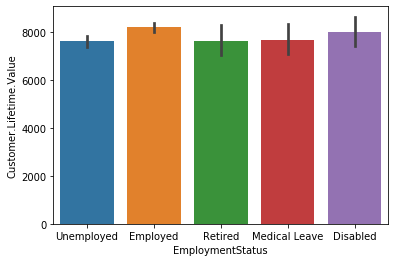

In [26]:
sns.barplot(x='EmploymentStatus',y='Customer.Lifetime.Value',data=data)

In [27]:
data.drop(['EmploymentStatus'],axis=1,inplace=True)

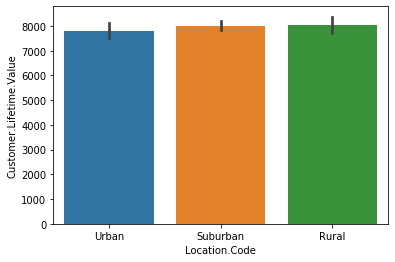

In [28]:
sns.barplot(x='Location.Code',y='Customer.Lifetime.Value',data=data)

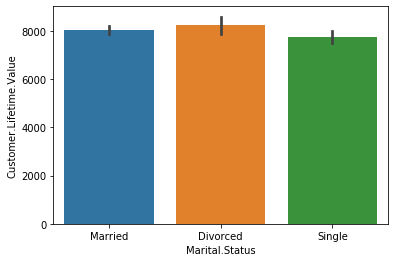

In [29]:
sns.barplot(x='Marital.Status',y='Customer.Lifetime.Value',data=data)

In [30]:
data.drop(['Marital.Status','Location.Code'],axis=1,inplace=True)

In [31]:
data.drop(['Location.Geo'],axis=1,inplace=True)

In [32]:
data.Policy.value_counts()

Personal L3     3637
Personal L2     2271
Personal L1     1274
Corporate L3    1067
Corporate L2     618
Corporate L1     410
Special L2       189
Special L3       155
Special L1        64
Name: Policy, dtype: int64

In [33]:
data['Policy.Type'].value_counts()

Personal Auto     6620
Corporate Auto    1920
Special Auto       375
Name: Policy.Type, dtype: int64

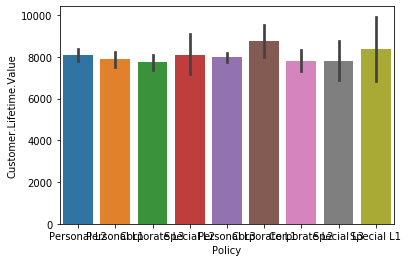

In [34]:
sns.barplot(x='Policy',y='Customer.Lifetime.Value',data=data)

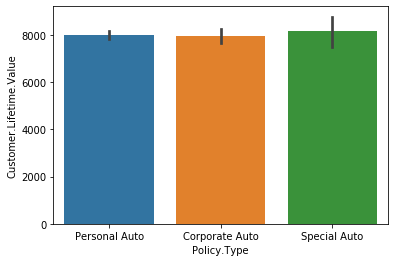

In [35]:
sns.barplot(x='Policy.Type',y='Customer.Lifetime.Value',data=data)

In [36]:
data.drop(['Policy'],axis=1,inplace=True)

In [37]:
data['Sales.Channel'].value_counts()

Agent          3670
Branch         2757
Call Center    1862
Web            1389
Name: Sales.Channel, dtype: int64

In [38]:
data.drop(['Sales.Channel'],axis=1,inplace=True)

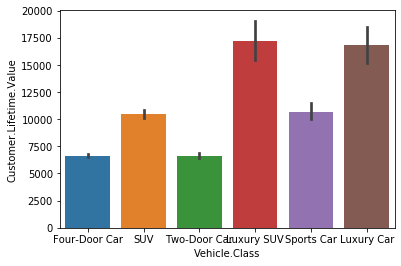

In [39]:
sns.barplot(x='Vehicle.Class',y='Customer.Lifetime.Value',data=data)

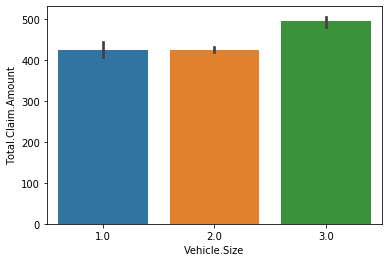

In [40]:
sns.barplot(x='Vehicle.Size',y='Total.Claim.Amount',data=data)

In [41]:
data.drop(['Vehicle.Size'],axis=1,inplace=True)

In [42]:
data.Coverage.value_counts()

Basic       5361
Extended    2697
Premium      823
Name: Coverage, dtype: int64

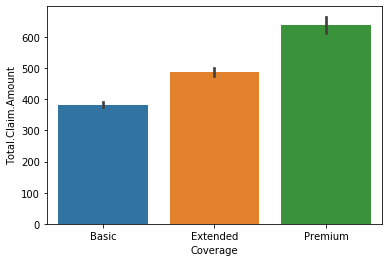

In [43]:
sns.barplot(x='Coverage',y='Total.Claim.Amount',data=data)

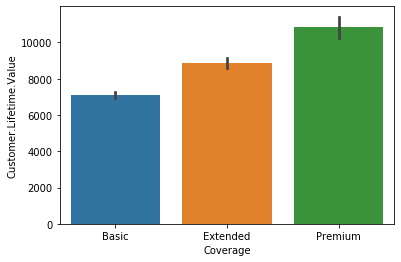

In [44]:
sns.barplot(x='Coverage',y='Customer.Lifetime.Value',data=data)

In [45]:
data.head()

,Customer.Lifetime.Value,Coverage,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Renew.Offer.Type,Total.Claim.Amount,Vehicle.Class
0,7824.372789,Basic,0,67.0,2,33,NaN,2.0,Personal Auto,Offer2,267.214383,Four-Door Car
1,8005.964669,Basic,63357,101.0,26,42,0.0,5.0,Personal Auto,Offer2,565.508572,SUV
2,8646.504109,Basic,64125,108.0,3,44,0.0,3.0,Personal Auto,Offer2,369.818708,SUV
3,9294.088719,Basic,67544,116.0,2,15,NaN,3.0,Corporate Auto,Offer1,556.800000,SUV
4,5595.971365,Basic,19651,72.0,3,68,0.0,5.0,Personal Auto,Offer2,345.600000,Two-Door Car


In [46]:
#sns.barplot(x='Renew.Offer.Type',y='Customer.Lifetime.Value',data=data)

In [47]:
data.drop(['Policy.Type'],axis=1,inplace=True)

In [48]:
data['Renew.Offer.Type'].value_counts()

Offer1    3975
Offer2    3084
Offer3    1540
Offer4    1079
Name: Renew.Offer.Type, dtype: int64

In [49]:
data.drop(['Income'],axis=1,inplace=True)

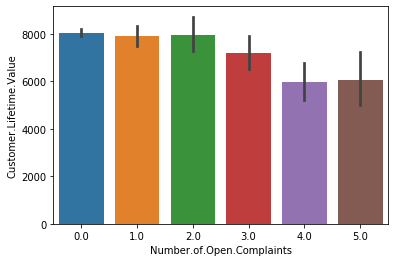

In [50]:
sns.barplot(x='Number.of.Open.Complaints',y='Customer.Lifetime.Value',data=data)

In [51]:
data.head()

,Customer.Lifetime.Value,Coverage,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Renew.Offer.Type,Total.Claim.Amount,Vehicle.Class
0,7824.372789,Basic,67.0,2,33,NaN,2.0,Offer2,267.214383,Four-Door Car
1,8005.964669,Basic,101.0,26,42,0.0,5.0,Offer2,565.508572,SUV
2,8646.504109,Basic,108.0,3,44,0.0,3.0,Offer2,369.818708,SUV
3,9294.088719,Basic,116.0,2,15,NaN,3.0,Offer1,556.800000,SUV
4,5595.971365,Basic,72.0,3,68,0.0,5.0,Offer2,345.600000,Two-Door Car


In [52]:
data.isnull().sum()

Customer.Lifetime.Value            0
Coverage                         925
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints        818
Number.of.Policies               121
Renew.Offer.Type                 128
Total.Claim.Amount                 0
Vehicle.Class                    126
dtype: int64

In [53]:
data.Coverage=pd.Categorical(data.Coverage,categories=['Basic','Extended','Premium','Others'],ordered=False)

In [54]:
data.Coverage.fillna('Others',inplace=True)

# Imputing missing values with KNN

In [55]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mode')

In [56]:
data['Number.of.Open.Complaints'].fillna(data['Number.of.Open.Complaints'].mode()[0],inplace=True)

In [57]:
data.isnull().sum()

Customer.Lifetime.Value            0
Coverage                           0
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints          0
Number.of.Policies               121
Renew.Offer.Type                 128
Total.Claim.Amount                 0
Vehicle.Class                    126
dtype: int64

In [58]:
data.shape

(9806, 10)

In [59]:
data['Renew.Offer.Type'].fillna(data['Renew.Offer.Type'].mode()[0],inplace=True)

In [60]:
data.isnull().sum()

Customer.Lifetime.Value            0
Coverage                           0
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints          0
Number.of.Policies               121
Renew.Offer.Type                   0
Total.Claim.Amount                 0
Vehicle.Class                    126
dtype: int64

In [61]:
data.dropna(inplace=True)

In [62]:
data.isnull().sum()

Customer.Lifetime.Value          0
Coverage                         0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Renew.Offer.Type                 0
Total.Claim.Amount               0
Vehicle.Class                    0
dtype: int64

In [63]:
data.dtypes

Customer.Lifetime.Value           float64
Coverage                         category
Monthly.Premium.Auto              float64
Months.Since.Last.Claim             int64
Months.Since.Policy.Inception       int64
Number.of.Open.Complaints         float64
Number.of.Policies                float64
Renew.Offer.Type                   object
Total.Claim.Amount                float64
Vehicle.Class                      object
dtype: object

In [64]:
data.head(10)

,Customer.Lifetime.Value,Coverage,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Renew.Offer.Type,Total.Claim.Amount,Vehicle.Class
0,7824.372789,Basic,67.0,2,33,0.0,2.0,Offer2,267.214383,Four-Door Car
1,8005.964669,Basic,101.0,26,42,0.0,5.0,Offer2,565.508572,SUV
2,8646.504109,Basic,108.0,3,44,0.0,3.0,Offer2,369.818708,SUV
3,9294.088719,Basic,116.0,2,15,0.0,3.0,Offer1,556.800000,SUV
4,5595.971365,Basic,72.0,3,68,0.0,5.0,Offer2,345.600000,Two-Door Car
5,16570.090090,Extended,211.0,30,13,0.0,6.0,Offer2,1012.800000,Luxury SUV
6,3653.703458,Extended,90.0,14,76,0.0,1.0,Offer2,478.751065,Two-Door Car
7,11154.675990,Extended,93.0,10,50,0.0,2.0,Offer1,381.960657,Four-Door Car
8,4428.031583,Basic,110.0,6,62,0.0,1.0,Offer1,303.872752,SUV
9,8382.630118,Basic,117.0,17,41,1.0,9.0,Offer1,561.600000,Sports Car


In [65]:
data['Number.of.Open.Complaints']=data['Number.of.Open.Complaints'].astype('int64')

In [66]:
data['Number.of.Policies']=data['Number.of.Policies'].astype('int64')

In [67]:
data.dtypes

Customer.Lifetime.Value           float64
Coverage                         category
Monthly.Premium.Auto              float64
Months.Since.Last.Claim             int64
Months.Since.Policy.Inception       int64
Number.of.Open.Complaints           int64
Number.of.Policies                  int64
Renew.Offer.Type                   object
Total.Claim.Amount                float64
Vehicle.Class                      object
dtype: object

In [68]:
data['Renew.Offer.Type']=data['Renew.Offer.Type'].astype('category')

In [69]:
data['Vehicle.Class']=data['Vehicle.Class'].astype('category')

In [70]:
x=data.copy().drop('Customer.Lifetime.Value',axis=1)

In [71]:
y=data['Customer.Lifetime.Value']

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=112)

In [73]:
x_train=pd.get_dummies(x_train,prefix=['Coverage','Renew.Offer.Type','Vehicle.Class'])
x_train

,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Coverage_Basic,Coverage_Extended,Coverage_Premium,Coverage_Others,Renew.Offer.Type_Offer1,Renew.Offer.Type_Offer2,Renew.Offer.Type_Offer3,Renew.Offer.Type_Offer4,Vehicle.Class_Four-Door Car,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car
6225,103.0,30,92,0,1,8.281829,1,0,0,0,0,1,0,0,0,0,0,1,0,0
294,74.0,23,31,0,3,599.375099,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1807,70.0,16,33,0,2,336.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,1
9061,89.0,22,93,0,2,49.451117,0,1,0,0,0,1,0,0,1,0,0,0,0,0
5087,70.0,22,4,0,5,164.746184,1,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,89.0,8,7,2,1,639.267653,0,1,0,0,0,0,0,1,0,0,0,0,0,1
5941,112.0,17,29,0,7,806.400000,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2660,71.0,9,32,0,1,125.510669,1,0,0,0,1,0,0,0,1,0,0,0,0,0
8534,73.0,16,38,0,2,326.400000,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [74]:
x_test=pd.get_dummies(x_test,prefix=['Coverage','Renew.Offer.Type','Vehicle.Class'])
x_test

,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Coverage_Basic,Coverage_Extended,Coverage_Premium,Coverage_Others,Renew.Offer.Type_Offer1,Renew.Offer.Type_Offer2,Renew.Offer.Type_Offer3,Renew.Offer.Type_Offer4,Vehicle.Class_Four-Door Car,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car
4975,66.0,7,59,0,2,439.701118,1,0,0,0,1,0,0,0,1,0,0,0,0,0
671,70.0,22,27,0,2,48.304125,1,0,0,0,0,1,0,0,1,0,0,0,0,0
918,64.0,32,22,0,3,297.600000,0,0,0,1,0,1,0,0,0,0,0,0,0,1
3064,72.0,9,28,0,2,732.352745,1,0,0,0,1,0,0,0,0,0,0,0,0,1
5909,77.0,12,17,0,8,452.095421,0,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,114.0,15,89,0,1,184.222768,1,0,0,0,1,0,0,0,0,0,0,1,0,0
9755,66.0,14,84,0,3,328.366827,1,0,0,0,0,1,0,0,1,0,0,0,0,0
3393,74.0,4,26,0,2,355.200000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
376,61.0,16,0,0,3,167.459769,0,0,0,1,0,1,0,0,1,0,0,0,0,0


In [77]:
x_train.shape

(7012, 20)

In [78]:
x_test.shape

(1753, 20)

Skewness: 3.004101
Kurtosis: 13.428506


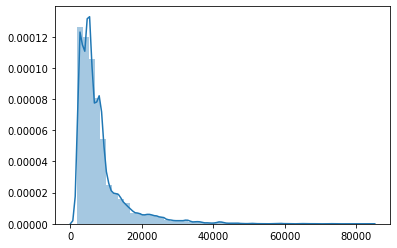

In [117]:
sns.distplot(pd.DataFrame(y))
print("Skewness: %f" % pd.DataFrame(y).skew())
print("Kurtosis: %f" % pd.DataFrame(y).kurt())

Skewness: 0.575297
Kurtosis: 0.083646


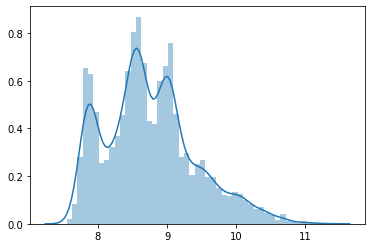

In [118]:
sns.distplot(pd.DataFrame(np.log(y)))
print("Skewness: %f" % pd.DataFrame(np.log(y)).skew())
print("Kurtosis: %f" % pd.DataFrame(np.log(y)).kurt())

In [79]:
linearmod=lm().fit(x_train,y_train)
linearmod

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
train_pred=linearmod.predict(x_train)

In [81]:
MAE=mean_absolute_error(y_train,train_pred)
MAE

3861.3929828181867

In [93]:
RMSE_train=sqrt(mean_squared_error(y_train,train_pred))
RMSE_train

6213.88748883851

In [83]:
test_pred=linearmod.predict(x_test)
RMSE_test=sqrt(mean_squared_error(y_test,test_pred))
RMSE_test

6547.32983813555

In [84]:
MAE_test=mean_absolute_error(y_test,test_pred)
MAE_test

3952.0363856102854

In [86]:
MAPE=np.mean(np.abs(y_train-train_pred)/y_train)*100
MAPE

58.9699467701059

In [87]:
linearmod_log=lm().fit(x_train,np.log(y_train))
linearmod_log

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
train_pred_log=linearmod_log.predict(x_train)

In [89]:
MAE=mean_absolute_error(np.log(y_train),train_pred_log)
MAE

0.4357716336419611

In [92]:
RMSE_train_log=sqrt(mean_squared_error(np.log(y_train),train_pred_log))
RMSE_train_log

0.5608572501680696

In [91]:
test_pred_log=linearmod_log.predict(x_test)
RMSE_test_log=sqrt(mean_squared_error(np.log(y_test),test_pred_log))
RMSE_test_log

0.5681280577597126

In [97]:
MAPE_log_train=np.mean(np.abs(np.log(y_train)-train_pred_log)/np.log(y_train))*100
MAPE_log_train

4.9118674937784315

In [99]:
MAPE_log_test=np.mean(np.abs(np.log(y_test)-test_pred_log)/np.log(y_test))
MAPE_log_test

0.04925391228145544

In [102]:
#clf = RandomForest(n_estimators=10000, random_state=0, n_jobs=-1)

In [1]:
#clf.fit(x_train,y_train
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [116]:
from xgboost import XGBRegressor
XGB = XGBRegressor(colsample_bytree=0.6, max_depth = 10,n_estimators = 200,random_state=0,alpha=0.1)
XGB.fit(x_train, y_train)
preds_train_XG = XGB.predict(x_train)

NameError: name 'XGBRegressor' is not defined

In [119]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [120]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [135]:
from sklearn.tree import DecisionTreeRegressor
DTReg=DecisionTreeRegressor(random_state=100)
DTReg.fit(x_train,np.log(y_train))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=100, splitter='best')

In [142]:
DTR_predtrain=DTReg.predict(x_train)
#DTR_predtrain=DTR_predtrain.reshape(-1,1)

In [143]:
DTR_predtest=DTReg.predict(x_test)

In [144]:
from sklearn import metrics

In [145]:
print('MAE:',metrics.mean_absolute_error(np.log(y_train),DTR_predtrain))
print('MSE:',metrics.mean_squared_error(np.log(y_train),DTR_predtrain))
print('RMSE:',np.sqrt(metrics.mean_squared_error(np.log(y_train),DTR_predtrain)))

MAE: 1.5009492636844265e-05
MSE: 7.987137461519558e-08
RMSE: 0.00028261524130024476


In [146]:
MAPE_dtr_train=np.mean(np.abs((np.log(y_train)-DTR_predtrain)/np.log(y_train)))*100
MAPE_dtr_train

0.0001803855027799277

In [148]:
MAPE_dtrlog_test=np.mean(np.abs((np.log(y_test)-DTR_predtest)/np.log(y_test)))*100
MAPE_dtrlog_test

1.4569305244516546

In [162]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)   


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [151]:
y_pred_RFF = regressor.predict(x_train)  # test the output by changing values 


In [153]:
y_pred_RFF_test=regressor.predict(x_test)

In [159]:
print('MAE:',metrics.mean_absolute_error((y_train),y_pred_RFF))
print('MSE:',metrics.mean_squared_error((y_train),y_pred_RFF))
print('RMSE:',np.sqrt(metrics.mean_squared_error((y_train),y_pred_RFF)))
print('MAPE:',np.mean(np.abs((y_train-y_pred_RFF)/(y_train)))*100)

MAE: 566.422511621005
MSE: 2058309.4670691956
RMSE: 1434.680963513908
MAPE: 4.452511862108824


In [158]:
print('MAE:',metrics.mean_absolute_error((y_test),y_pred_RFF_test))
print('MSE:',metrics.mean_squared_error((y_test),y_pred_RFF_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error((y_test),y_pred_RFF_test)))
print('MAPE:',np.mean(np.abs((y_test-y_pred_RFF_test)/(y_test)))*100)

MAE: 1591.3189976827089
MSE: 16718884.737053307
RMSE: 4088.87328454347
MAPE: 12.194384877213496
